In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_test = y_test.reshape(-1,)

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [10]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

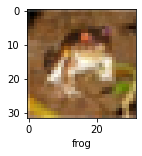

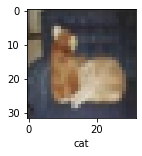

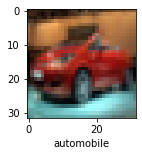

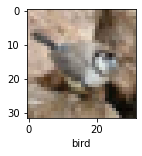

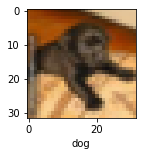

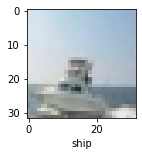

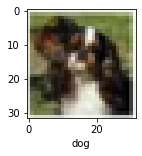

In [33]:
plot_sample(X_train, y_train, 0)
plot_sample(X_train, y_train, 17)
plot_sample(X_train, y_train, 45)
plot_sample(X_train, y_train, 90)
plot_sample(X_train, y_train, 56)
plot_sample(X_train, y_train, 100)
plot_sample(X_train, y_train, 500)

In [13]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [14]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=20)


Epoch 1/20
1563/1563 [==============================] - 99s 62ms/step - loss: 1.8114 - accuracy: 0.3549
Epoch 2/20
1563/1563 [==============================] - 96s 62ms/step - loss: 1.6222 - accuracy: 0.4276
Epoch 3/20
1563/1563 [==============================] - 93s 60ms/step - loss: 1.5382 - accuracy: 0.4568
Epoch 4/20
1563/1563 [==============================] - 96s 61ms/step - loss: 1.4822 - accuracy: 0.4766
Epoch 5/20
1563/1563 [==============================] - 95s 60ms/step - loss: 1.4284 - accuracy: 0.4955
Epoch 6/20
1563/1563 [==============================] - 93s 60ms/step - loss: 1.3875 - accuracy: 0.5108
Epoch 7/20
1563/1563 [==============================] - 93s 60ms/step - loss: 1.3481 - accuracy: 0.5260
Epoch 8/20
1563/1563 [==============================] - 93s 60ms/step - loss: 1.3138 - accuracy: 0.5375
Epoch 9/20
1563/1563 [==============================] - 92s 59ms/step - loss: 1.2804 - accuracy: 0.5519
Epoch 10/20
1563/1563 [==============================] - 91s 58m

In [40]:
ann.save('ann_model.h5')

In [15]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 6s 19ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.55      0.60      1000
           1       0.67      0.68      0.67      1000
           2       0.57      0.30      0.39      1000
           3       0.35      0.41      0.38      1000
           4       0.49      0.45      0.47      1000
           5       0.52      0.36      0.42      1000
           6       0.42      0.81      0.55      1000
           7       0.70      0.52      0.60      1000
           8       0.66      0.68      0.67      1000
           9       0.56      0.66      0.60      1000

    accuracy                           0.54     10000
   macro avg       0.56      0.54      0.54     10000
weighted avg       0.56      0.54      0.54     10000



In [16]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [23]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
cnn.fit(X_train, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 37s 23ms/step - loss: 0.0712 - accuracy: 0.9771
Epoch 2/20
1563/1563 [==============================] - 37s 24ms/step - loss: 0.0596 - accuracy: 0.9801
Epoch 3/20
1563/1563 [==============================] - 36s 23ms/step - loss: 0.0653 - accuracy: 0.9781
Epoch 4/20
1563/1563 [==============================] - 36s 23ms/step - loss: 0.0623 - accuracy: 0.9804
Epoch 5/20
1563/1563 [==============================] - 39s 25ms/step - loss: 0.0645 - accuracy: 0.9793
Epoch 6/20
1563/1563 [==============================] - 36s 23ms/step - loss: 0.0704 - accuracy: 0.9777
Epoch 7/20
1563/1563 [==============================] - 36s 23ms/step - loss: 0.0564 - accuracy: 0.9821
Epoch 8/20
1563/1563 [==============================] - 36s 23ms/step - loss: 0.0580 - accuracy: 0.9813
Epoch 9/20
1563/1563 [==============================] - 5676s 4s/step - loss: 0.0618 - accuracy: 0.9797
Epoch 10/20
1563/1563 [==============================] - 36s 23m

In [41]:
cnn.save('cnn_model.h5')

In [36]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_classes))

313/313 [==============================] - 2s 8ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.74      0.70      1000
           1       0.78      0.78      0.78      1000
           2       0.61      0.48      0.54      1000
           3       0.47      0.47      0.47      1000
           4       0.64      0.56      0.60      1000
           5       0.53      0.61      0.57      1000
           6       0.78      0.70      0.74      1000
           7       0.69      0.77      0.73      1000
           8       0.80      0.77      0.78      1000
           9       0.75      0.78      0.76      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.67     10000
weighted avg       0.67      0.67      0.67     10000



In [35]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 4.6137 - accuracy: 0.6677


[4.61374568939209, 0.6676999926567078]

In [25]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 2s 8ms/step


array([[1.39729663e-19, 2.20035900e-14, 9.10308492e-17, 3.02418973e-03,
        6.35489220e-21, 9.96975780e-01, 4.27141461e-10, 2.88099884e-28,
        1.53620098e-25, 7.70588645e-30],
       [8.12480234e-22, 3.63758515e-24, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 1.52096747e-36],
       [1.18336043e-08, 5.81922531e-02, 5.71443763e-17, 2.58090304e-16,
        2.54997326e-20, 6.29735041e-18, 5.71062942e-30, 1.04150256e-13,
        9.41806972e-01, 8.18219235e-07],
       [1.00000000e+00, 2.98019942e-10, 5.32925613e-12, 4.97246133e-10,
        5.92692882e-16, 4.03658883e-32, 3.94880526e-30, 1.34132732e-14,
        1.61410796e-08, 3.23104106e-14],
       [5.41017273e-19, 9.56407872e-14, 2.99082285e-06, 5.37079461e-02,
        9.45129216e-01, 3.55481234e-07, 1.15952466e-03, 1.02616028e-20,
        1.46879683e-20, 1.04141589e-16]], dtype=float32)

In [26]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[5, 8, 8, 0, 4]

In [27]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

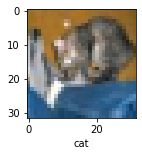

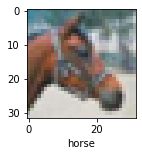

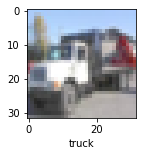

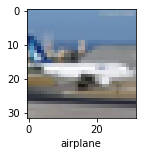

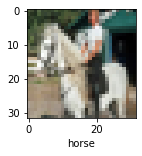

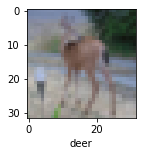

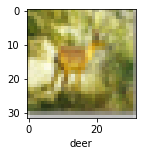

In [38]:
plot_sample(X_test, y_test,0)
plot_sample(X_test, y_test,17)
plot_sample(X_test, y_test,45)
plot_sample(X_test, y_test,90)
plot_sample(X_test, y_test,56)
plot_sample(X_test, y_test,100)
plot_sample(X_test, y_test,500)

In [29]:
classes[y_classes[3]]

'airplane'

In [42]:
classes[y_classes[0]]

'dog'